<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
# type your code here
df_malaria = pd.read_csv("malaria.csv")
df_malaria.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here
list(df_malaria[df_malaria.isnull().sum(axis = 1) == df_malaria.shape[1]].index)

[4, 21, 39, 99]

In [20]:
# We can observe that there are 4 rows where there is no data recorded.
#[4, 21, 39, 99] are the rows where there is no data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# type your code here

df_malaria.columns[(df_malaria.isnull().sum()/df_malaria.shape[0] * 100) >60].to_list()


['Cases_Nigeria',
 'Cases_Senegal',
 'Cases_Spain',
 'Cases_Mali',
 'Deaths_Nigeria',
 'Deaths_Senegal',
 'Deaths_Spain',
 'Deaths_Mali']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
# Cases_Guinea	Cases_Liberia	Cases_SierraLeone	Cases_Nigeria

df_guinea = df_malaria[['Cases_Guinea', 'Deaths_Guinea']]
print("Null values in guinea", df_guinea.isnull().sum().sum())

df_liberia = df_malaria[['Cases_Liberia', 'Deaths_Liberia']]
print("Null values in liberia", df_liberia.isnull().sum().sum())

df_SierraLeone = df_malaria[['Cases_SierraLeone', 'Deaths_SierraLeone']]
print("Null values in SierraLeone", df_SierraLeone.isnull().sum().sum())

df_Nigeria = df_malaria[['Cases_Nigeria', 'Deaths_Nigeria']]
print("Null values in Nigeria", df_Nigeria.isnull().sum().sum())

Null values in guinea 69
Null values in liberia 90
Null values in SierraLeone 80
Null values in Nigeria 178


We would be considering Nigeria to record the data once again.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

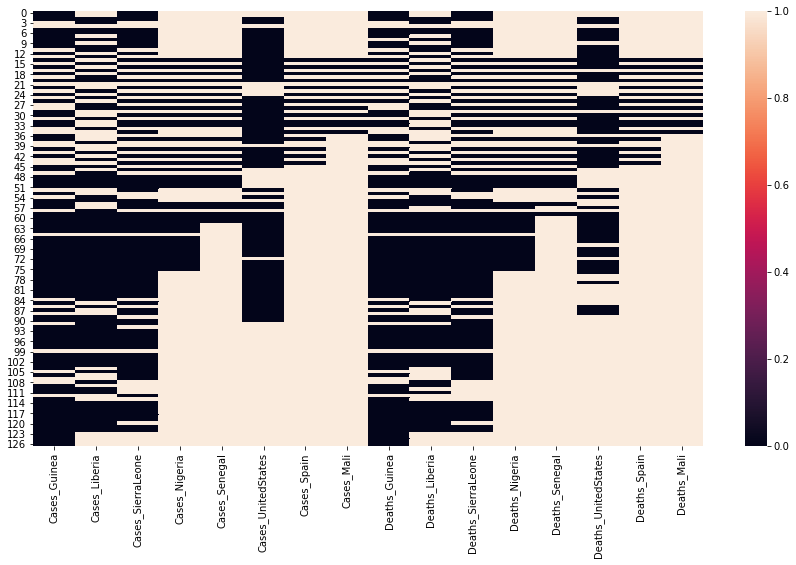

In [59]:
# type your code here
plt.figure(figsize = (15,8))
sns.heatmap(df_malaria.isnull())
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
# thresh parameter that specifies the minimum number of non - NA values in row/column in order for it to be considered in final result
# if thresh = 2: any row where there are minimumn 2 non-NA values will be kept
# All the rows with <thresh non-NA values will be removed
# keep the rows that have atleast 3 non-NA values recorded

df_malaria.dropna(thresh = 3)       # keep the rows that have atleast 3 non-NA values recorded

print('SHape of the df befor removing rows:', df_malaria.shape)
df = df_malaria.dropna(thresh=3)  
print('SHape of the df after removing rows:', df.shape)


SHape of the df befor removing rows: (127, 16)
SHape of the df after removing rows: (110, 16)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here

#Assuming to remove columns with more than 60% null values to be unnecessary
list_columns = list(df_malaria.columns[(df_malaria.isnull().sum()/df_malaria.shape[0] * 100) >60].to_list())
df_malaria.drop(list_columns, axis = 1)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,66.0,6.0,5.0,NaN
123,86.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,59.0,NaN,NaN,NaN


In [24]:
df_malaria.dropna(axis=1, thresh=0.4*df_malaria.shape[0])

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,66.0,6.0,5.0,NaN
123,86.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,59.0,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# type your code here
# missing values
# mean, median: numerical variables
# mode, bfill, ffill: categorical variables

df['Cases_Liberia'].skew()

0.9932723311196073

In [26]:
# Data is skewed so we will add median for missing values

In [27]:
df_malaria['Cases_Liberia'] = df_malaria['Cases_Liberia'].fillna(df_malaria['Cases_Liberia'].mean()).skew()
df_malaria['Cases_Liberia'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
df_malaria['Cases_UnitedStates'].skew()

0.4685235032170701

In [38]:
df_malaria['Cases_UnitedStates'].fillna(df_malaria['Cases_Liberia'].mean()).skew()

0.9457844002543594

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
df_guinea.skew()

Cases_Guinea     1.002301
Deaths_Guinea    1.108879
dtype: float64

In [31]:
df_guinea

,Cases_Guinea,Deaths_Guinea
0,2776.0,1786.0
1,2775.0,1781.0
2,2769.0,1767.0
3,NaN,NaN
4,NaN,NaN
...,...,...
122,103.0,66.0
123,86.0,62.0
124,86.0,60.0
125,86.0,59.0


In [32]:
df_guinea.fillna(df_guinea.mean()).skew()

Cases_Guinea     1.166116
Deaths_Guinea    1.296872
dtype: float64

In [33]:
for col in df_guinea.columns:
    print(df[col].fillna(df[col].mean()).skew())

1.0541646913405367
1.191400314469378


In [34]:
for col in df_guinea.columns:
    print(df[col].fillna(df[col].median()).skew())


1.2967270696598419
1.4178010883539272


In [35]:
for col in df_guinea.columns:
    df[col].fillna(df[col].mean(),inplace = True)
    print(df[col].isnull().sum())


0
0


## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

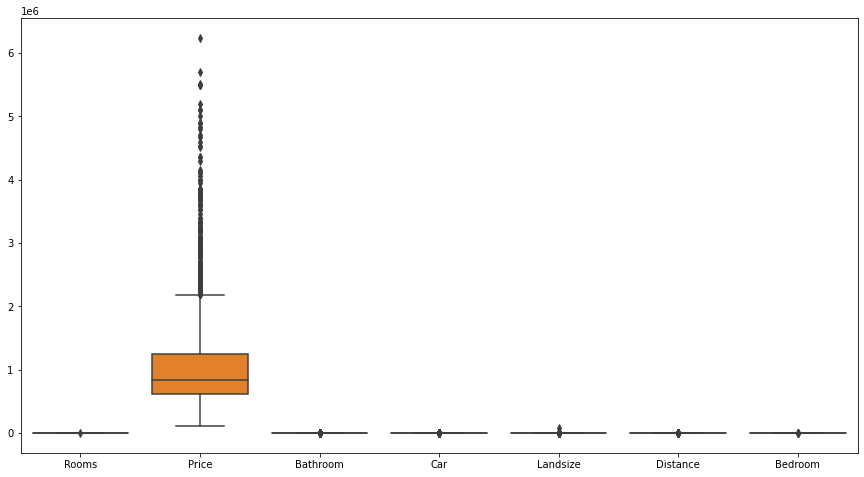

In [7]:
# type your code here
df_house = pd.read_csv('house.csv')
plt.figure(figsize=(15,8))
sns.boxplot(data = df_house)
plt.show()
#Price has lots of outliers

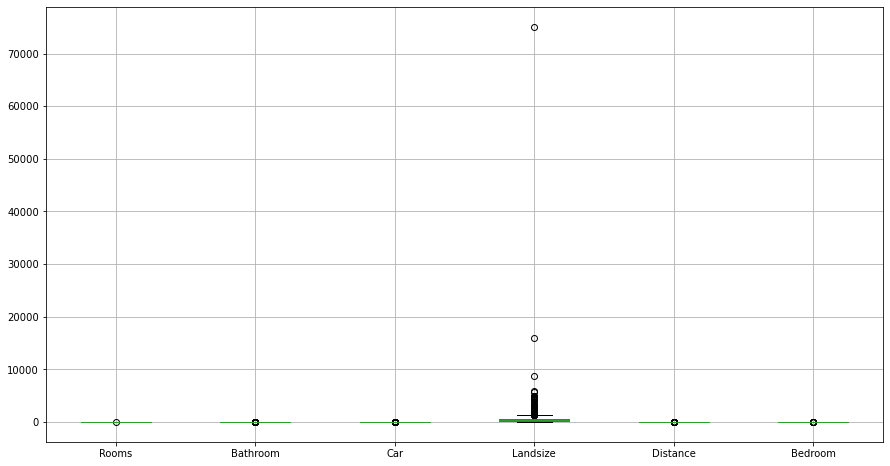

In [129]:
plt.figure(figsize=(15,8))
df_house.loc[:,df_house.columns!= 'Price'].boxplot()
plt.show()

In [130]:
l = []
for i in df_house.columns:
    if i!='Price' and i!='Landsize':
        l.append(i)
l

['Rooms',
 'Type',
 'Method',
 'Regionname',
 'Bathroom',
 'Car',
 'Distance',
 'Bedroom']

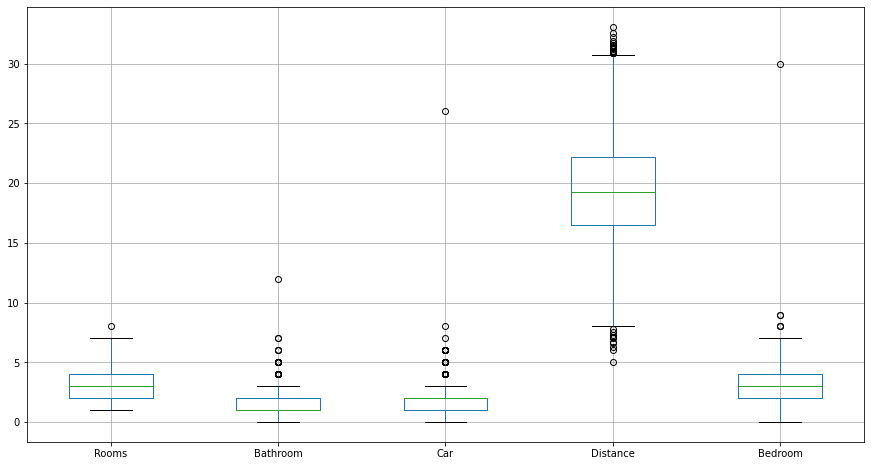

In [131]:
plt.figure(figsize=(15,8))
df_house.loc[:,l].boxplot()
plt.show()


In [ ]:
# Rooms has only one outlier. So I can skip treating rooms.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

[ 5  4  4  4  4  4  6  4  4  6  5  4  4  4  4  4  4  4  4  5  4  4  4  4
  4  4  4  4  4  4  7  4  4  4  4  4  5  4  6  4  4  4  4  4  4  4  6  4
  5  4  4  4  4  5  4  4  4  4  4  4  4  4  4  4  6  4  4  4  6  4  4  4
  5  4  5  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  6  4  4  4  5  4  4  4  4  4  4  6  5  4  6  5  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  4  4  4  4  5  4  4
  4  4  4  6  4  4  4  4  4  4  4  4  4  5  4  4  4  4  4  4  4 26  4  4
  5  4  4  4  4  4  4  4  4  4  4  4  8  6  4  5  5  4  4  5  4  4  4  4
  4  4  5  4  4  4  4  4  6  4  4  4  5  4]


206

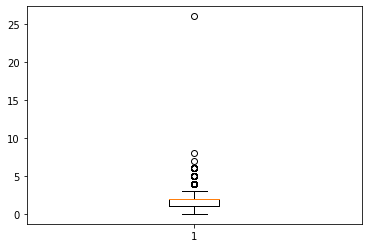

In [133]:
# type your code here

a = plt.boxplot(df_house['Car'])
for i in a['fliers']:
    print(i.get_ydata())
    
len([i.get_ydata() for i in a['fliers']][0])


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

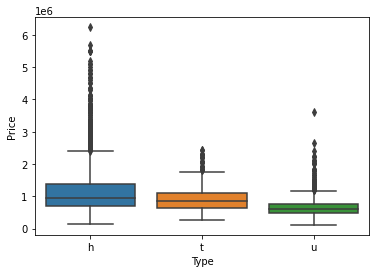

In [134]:
# type your code here

sns.boxplot(df_house['Type'], df_house['Price'])
plt.show()

In [ ]:
# From the above plot, we can observe that cottages, villas have a huge range of price values because this type of real estate
# is usually subject to more customization and hence affects the price and has more outliers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
# type your code here
# extreme values: z-score, iqr
# z-score = (x-mean)/std

from scipy.stats import zscore
zscore(df_house['Rooms'])


array([-0.08931275, -0.08931275, -0.08931275, ...,  0.97751574,
       -0.08931275, -0.08931275])

In [63]:
str(df_house['Rooms'][np.abs(zscore(df_house['Rooms']))>3].to_list())

'[7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 6, 8, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6]'

In [142]:
# using zscore: extreme values: the ones lying beyong -3 and 3

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

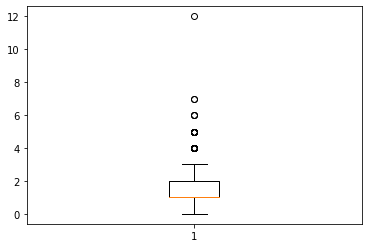

In [140]:
# type your code here
plt.boxplot(df_house['Bathroom'])
plt.show()

In [141]:
# We can use either use IQR method/z-score to find the outliers in the bathroom column.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# type your code here
q1 = df_house['Bedroom'].quantile(0.25)
q3 = df_house['Bedroom'].quantile(0.75)

IQR = q3-q1
lower = q1-(1.5*IQR)
upper = q3+(1.5*IQR)

df_house['Bedroom'][(df_house['Bedroom']>upper) | (df_house['Bedroom']<lower)].index.to_list()

[279, 467, 1228, 1937, 4241, 4249]

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df_house.shape

(4766, 10)

In [11]:
# type your code here

old_mean = df_house['Distance'].mean()

q1=df_house['Distance'].quantile(0.25)    
q3=df_house['Distance'].quantile(0.75)
IQR=q3-q1
lower=q1-(1.5*IQR)
upper=q3+(1.5*IQR)
print(len(df_house['Distance'][~((df_house['Distance']>upper) | (df_house['Distance']<lower))].index.to_list()))
new_mean=df_house['Distance'][((df_house['Distance']<upper) & (df_house['Distance']>lower))].mean()
print(new_mean)


4735
19.311425554382247


In [154]:
print("There is a change of", round(old_mean-new_mean,3), 'after removing the extreme values')

There is a change of 0.017 after removing the extreme values


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

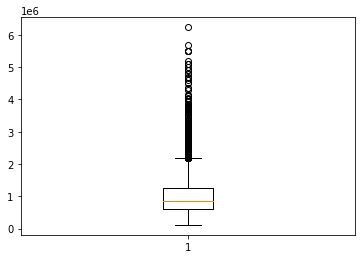

In [155]:
# type your code here

plt.boxplot(df_house['Price'])
plt.show()

2


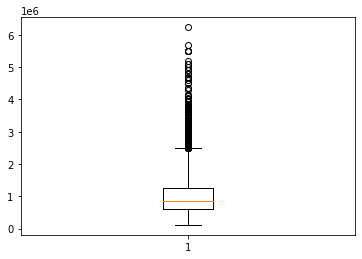

3


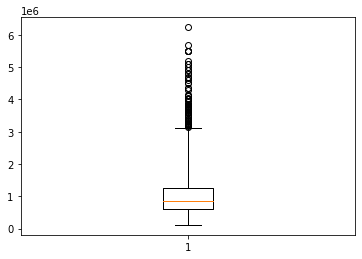

4


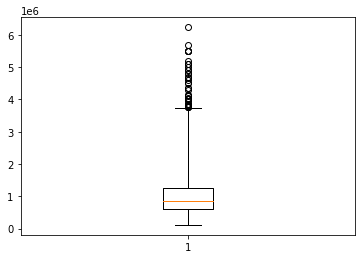

5


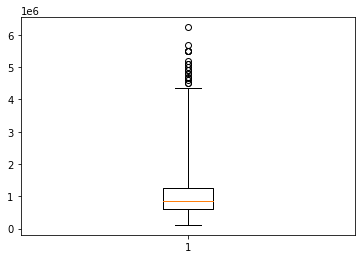

6


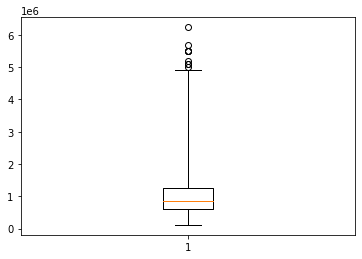

7


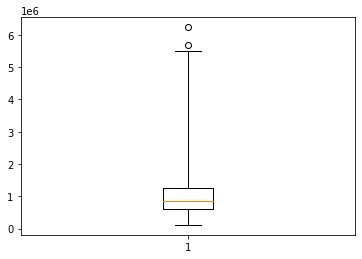

8


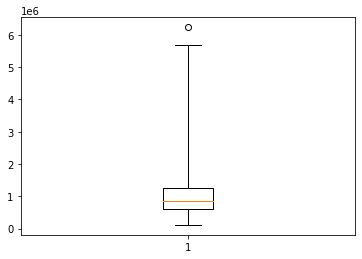

9


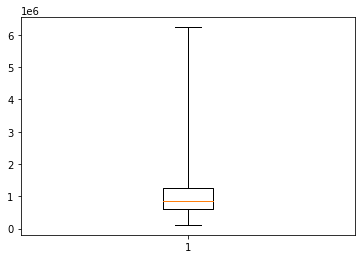

In [196]:
for i in range(2,10):
    print(i)
    plt.boxplot(df_house['Price'], whis=i)
    plt.show()

In [156]:
# We can take the range of K from 7 to 9 so that most of the outliers are removed

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [158]:
# type your code here

df_house['Distance'].min()

5.0

In [56]:
df_house['Distance'].max()

33.1

In [160]:
df_house['Distance'].max() - df_house['Distance'].min()

28.1

In [166]:
def divide_groups(x):
    if x<=14:
        return('Walking')
    elif x>14 and x<=25:
        return('Close By')
    else:
        return("Far Away")
        
df_house['Distance'].apply(divide_groups)

0       Far Away
1       Close By
2       Close By
3       Close By
4       Close By
          ...   
4761    Close By
4762    Close By
4763    Close By
4764    Close By
4765     Walking
Name: Distance, Length: 4766, dtype: object

In [185]:
#df_house['Distance'] = pd.cut(df_house['Distance'], bins = 3, labels=['Walking', 'Close By', 'Far Away'])
df_house['Distance'].value_counts()

close_by    3509
far_away     670
Walking      587
Name: Distance, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

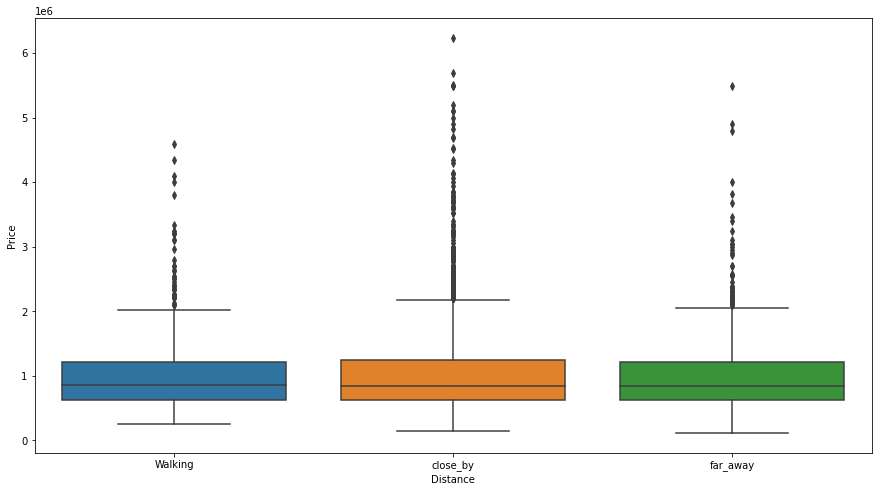

In [189]:
# type your code here

plt.figure(figsize = (15,8))
sns.boxplot(df_house["Distance"], df_house["Price"])
plt.show()

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [190]:
# type your code here
from sklearn.model_selection import train_test_split


In [193]:
train, test = train_test_split(df_house['Price'], test_size = 0.2, random_state=0)
print(train.shape)
print(test.shape)

(3812,)
(954,)


In [195]:
df_house.shape

(4766, 10)